<a href="https://colab.research.google.com/github/YangYangJiJi/TIL/blob/main/mushroom_vs_umbrella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나만의 이미지 분류 모델 만들기
- 작성자: DSC 이영현 / 양지현

## 주제
우산과 버섯 분류하는 모델 만들기

참고 사이트:


# 라이브러리

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image, image_dataset_from_directory

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터셋 경로 설정
dataset_dir = "/content/drive/MyDrive/train_img"

# 데이터 불러오기 (이미지 크기: 28x28, 검증 데이터 20% 자동 분할)
batch_size = 32
img_size = 256 #모델이 수용할 수 있는 사이즈 미리 설정

dataset = image_dataset_from_directory(
    dataset_dir,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    validation_split=0.2,  # 20%를 검증 데이터로 사용
    subset="both",
    seed=42  # 재현성을 위한 랜덤 시드 #데이터를 랜덤하게 8:2로 나눔. 재현성 유지할 수 있게 seed 설정
)

train_dataset, val_dataset = dataset

# 클래스 이름 확인
class_names = train_dataset.class_names
print(f"클래스 목록: {class_names}") #이렇게 데이터 셋 가져오기


Found 95 files belonging to 2 classes.
Using 76 files for training.
Using 19 files for validation.
클래스 목록: ['mushroom', 'umbrella']


# 모델 구축

In [ ]:
# CNN 모델 정의
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),  # 정규화
    #마지막 3은 RBS 3개를 의미함.

    layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")  # 클래스 개수 자동 설정
])

# 모델 컴파일
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 모델 요약 정보 출력
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,412,578 (32.09 MB)

 Trainable params: 8,412,578 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

# 모델 학습

In [ ]:
# 모델 학습
epochs = 15 #에폭을 15바퀴 돌리겠다.
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

# train 정확도는 95
# validation 정확도는 89


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.4805 - loss: 1.4003 - val_accuracy: 0.4211 - val_loss: 2.4592
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5868 - loss: 1.5730 - val_accuracy: 0.8947 - val_loss: 0.3486
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9188 - loss: 0.2972 - val_accuracy: 0.7368 - val_loss: 0.3777
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8639 - loss: 0.3043 - val_accuracy: 0.8947 - val_loss: 0.3474
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8980 - loss: 0.2852 - val_accuracy: 0.8947 - val_loss: 0.3081
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9097 - loss: 0.2587 - val_accuracy: 0.9474 - val_loss: 0.2560
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9215 - loss: 0.2136 - val_accuracy: 0.8947 - val_loss: 0.3163
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9398 - loss: 0.1777 - val_accuracy: 0.9474 - val_loss: 0.2374

# 1장씩 테스트

In [ ]:
def check_img_and_classification(img_path):
    # 원본 이미지 출력
    print('##### 원본 이미지 #####')
    img = mpimg.imread(img_path)  # 이미지 파일을 읽어옴
    plt.imshow(img)  # 이미지를 화면에 표시
    plt.show()  # 이미지를 보여줌
    print(f'img.shape: {img.shape}')

    # 새 이미지 불러오기 및 전처리
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    print('##### 리사이즈 이미지 #####') # 256x 256사이즈
    plt.imshow(img_array[0].astype(np.uint8))
    plt.show()
    print(f'img.shape: {img_array.shape}')

    # 예측 수행
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]

    print('##### 분류 결과 #####')
    for name, prob in zip(class_names, predictions[0]):
        print(f'{name}: {prob:.2f}')

    print(f"Predicted class: {predicted_class}")

## 카리나

##### 원본 이미지 #####


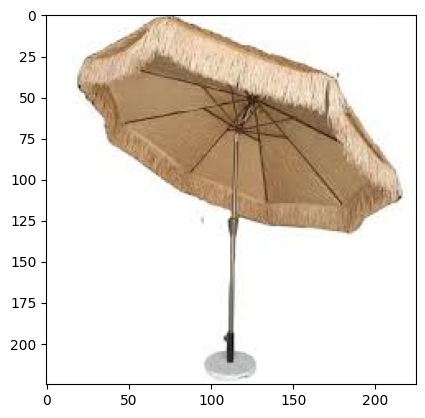

img.shape: (225, 225, 3)
##### 리사이즈 이미지 #####


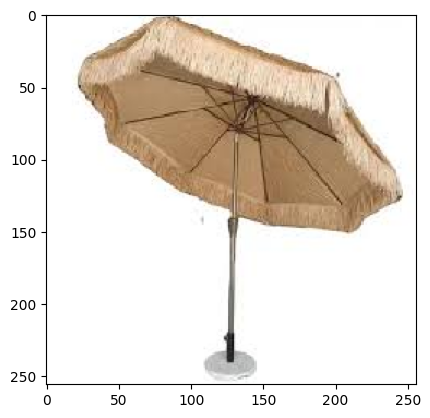

img.shape: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
##### 분류 결과 #####
mushroom: 0.05
umbrella: 0.95
Predicted class: umbrella


In [ ]:
img_path = "/content/drive/MyDrive/inco_CNN/test_img/umbrella/images.jpg"
check_img_and_classification(img_path)

## GPT로 그린 버섯과 비슷한 모양의 우산

##### 원본 이미지 #####


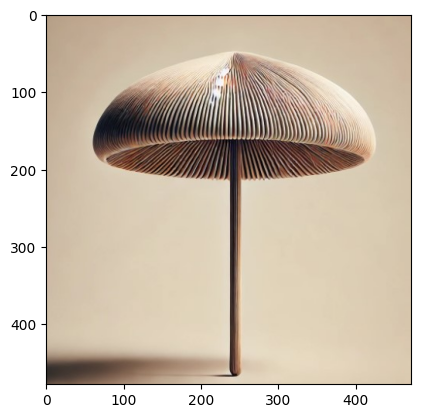

img.shape: (478, 472, 3)
##### 리사이즈 이미지 #####


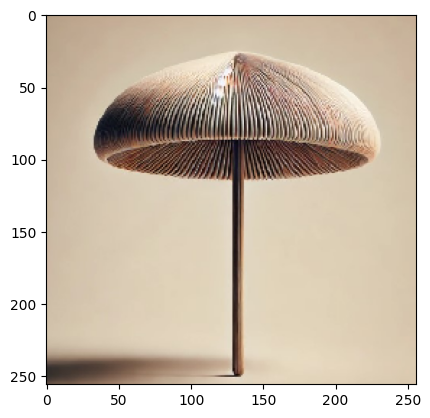

img.shape: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
##### 분류 결과 #####
mushroom: 0.09
umbrella: 0.91
Predicted class: umbrella


In [ ]:
img_path = "/content/drive/MyDrive/inco_CNN/test_img/umbrella/GPT사진.jpg"
check_img_and_classification(img_path)

## GPT로 그린 우산과 비슷한 모양의 버섯

##### 원본 이미지 #####


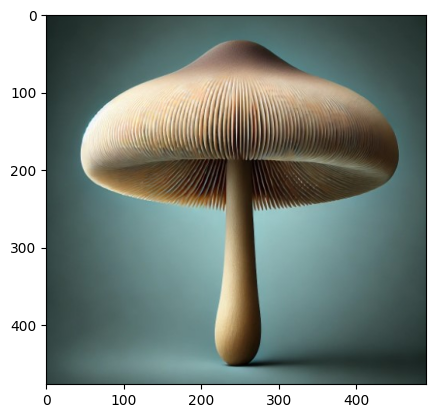

img.shape: (477, 490, 3)
##### 리사이즈 이미지 #####


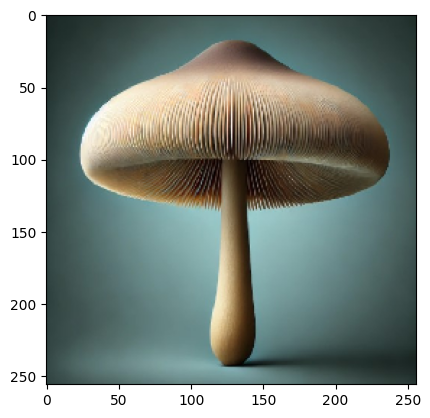

img.shape: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
##### 분류 결과 #####
mushroom: 0.35
umbrella: 0.65
Predicted class: umbrella


In [9]:
img_path = "/content/drive/MyDrive/inco_CNN/test_img/mushroom/GPT사진_버섯.jpg"
check_img_and_classification(img_path)

# 틀렸다.